In [1]:
import numpy as np
import os, sys, scipy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import scikits.bootstrap as bootstrap  
from scipy.stats.stats import spearmanr, zscore
from scipy.ndimage.filters import gaussian_filter1d
from necessary_analysis_scripts import prettify_plot, calculate_aprime, load_data, load_data_cd
from necessary_analysis_scripts import run_stats_onetail, run_stats_twotail

# Plotting defaults 

In [2]:
#plot within jupyter notebooks
%matplotlib inline 

#tab completion for files
%config IPCompleter.greedy=True 

#supress scientific notation
np.set_printoptions(suppress=True) 

#font defaults
plt.rcParams.update({'font.size': 14})
rc('text', usetex=False)
plt.rcParams['pdf.fonttype'] = 42
if os.path.isfile("/Library/Fonts/HelveticaNeue-Light.ttf"): 
    prop = fm.FontProperties(fname="/Library/Fonts/HelveticaNeue-Light.ttf",size=24)
else:
    prop = fm.FontProperties(size=24)

#color defaults
col_corr = [0/255.,98/255.,100/255.]
col_incorr = [218/255.,66/255.,36/255.]

# Load data from Experiment 2a

In [3]:
#load hybrid task data for both experiments
dat_2a = load_data('expt2a')

#load change detection task data
dat_cd_2a = load_data_cd('expt2a')

# Load data from Experiment 2b

In [4]:
#load hybrid task data for both experiments
dat_2b = load_data('expt2b')

#load change detection task data
dat_cd_2b = load_data_cd('expt2b')

# Analyze data from Experiment 2a

In [5]:
#preallocate empty variables for expt 2a
nsubj_2a = len(dat_2a)
cd_k_2a = np.zeros(nsubj_2a)
wm_fast_n_2a = np.zeros(nsubj_2a)
wm_slow_n_2a = np.zeros(nsubj_2a)
wm_n_2a = np.zeros(nsubj_2a)
infreq_acc_2a = np.zeros(nsubj_2a)

#Expt 2a
for isubj in range(nsubj_2a):
    #change detection
    i_diff_probe = np.logical_and(~np.isnan(dat_cd_2a[isubj].cd_rt),dat_cd_2a[isubj].cd_same_probe==0)
    h = np.nanmean(dat_cd_2a[isubj].cd_acc[i_diff_probe])
    i_same_probe = np.logical_and(~np.isnan(dat_cd_2a[isubj].cd_rt),dat_cd_2a[isubj].cd_same_probe==1)
    fa = 1-np.nanmean(dat_cd_2a[isubj].cd_acc[i_same_probe])
    cd_k_2a[isubj] = 6*(h-fa)
    
    #hybrid task
    infreq_trials = np.where(dat_2a[isubj].freq_trials==0)[0]
    infreq_acc_2a[isubj] = np.mean(dat_2a[isubj].acc[infreq_trials]==1)
    fast_probe_trials = np.where(dat_2a[isubj].fast_rt_trigger==1)[0]
    wm_fast_n_2a[isubj] = np.mean(dat_2a[isubj].wholereport_respacc_total[fast_probe_trials])
    slow_probe_trials = np.where(dat_2a[isubj].slow_rt_trigger==1)[0]
    wm_slow_n_2a[isubj] = np.mean(dat_2a[isubj].wholereport_respacc_total[slow_probe_trials])
    probe_trials = np.where(dat_2a[isubj].probe_trials==1)[0]
    wm_n_2a[isubj] = np.mean(dat_2a[isubj].wholereport_respacc_total[probe_trials])

/Users/megan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/megan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Analyze data from Experiment 2b

In [6]:
#preallocate empty variables for expt 2b
nsubj_2b = len(dat_2b)
cd_k_2b = np.zeros(nsubj_2b)
wm_fast_n_2b = np.zeros(nsubj_2b)
wm_slow_n_2b = np.zeros(nsubj_2b)
wm_n_2b = np.zeros(nsubj_2b)
infreq_acc_2b = np.zeros(nsubj_2b)
    
for isubj in range(nsubj_2b):
    #change detection
    i_diff_probe = np.logical_and(~np.isnan(dat_cd_2b[isubj].cd_rt),dat_cd_2b[isubj].cd_same_probe==0)
    h = np.nanmean(dat_cd_2b[isubj].cd_acc[i_diff_probe])
    i_same_probe = np.logical_and(~np.isnan(dat_cd_2b[isubj].cd_rt),dat_cd_2b[isubj].cd_same_probe==1)
    fa = 1-np.nanmean(dat_cd_2b[isubj].cd_acc[i_same_probe])
    cd_k_2b[isubj] = 6*(h-fa)
    
    #excluderepeat particpants... note this is overly cautious for individual differences & doesn't change conclusions
    if isubj==10:
        cd_k_2b[10] = np.nan
    elif isubj==15:
        cd_k_2b[15] = np.nan
        
    #hybrid task
    infreq_trials = np.where(dat_2b[isubj].freq_trials==0)[0]
    infreq_acc_2b[isubj] = np.mean(dat_2b[isubj].acc[infreq_trials]==1)
    fast_probe_trials = np.where(dat_2b[isubj].fast_rt_trigger==1)[0]
    wm_fast_n_2b[isubj] = np.mean(dat_2b[isubj].wholereport_respacc_total[fast_probe_trials+1])
    slow_probe_trials = np.where(dat_2b[isubj].slow_rt_trigger==1)[0]
    wm_slow_n_2b[isubj] = np.mean(dat_2b[isubj].wholereport_respacc_total[slow_probe_trials+1])
    probe_trials = np.where(dat_2b[isubj].probe_trials==1)[0]
    wm_n_2b[isubj] = np.mean(dat_2b[isubj].wholereport_respacc_total[probe_trials+1])

/Users/megan/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


# Combine results from Experiments 2a and 2b

In [7]:
#combine results from both experiments
cd_k = np.append(cd_k_2a,cd_k_2b)
wm_d = np.append(wm_slow_n_2a-wm_fast_n_2a,wm_slow_n_2b-wm_fast_n_2b)
wm_n = np.append((wm_fast_n_2a+wm_slow_n_2a)/2,(wm_fast_n_2b+wm_slow_n_2b)/2)

#exclude the participants who did not complete the change detection task 
wm_d = wm_d[~np.isnan(cd_k)]
wm_n = wm_n[~np.isnan(cd_k)]
cd_k = cd_k[~np.isnan(cd_k)]

#print mean K 
cd_k_CIs = bootstrap.ci(data=(cd_k), statfunction=scipy.mean,n_samples=10000)
print('Expt2a&2b: mean k = ', np.round(np.nanmean(cd_k),decimals=2),np.round(cd_k_CIs,decimals=2),"N =", np.size(cd_k))


Expt2a&2b: mean k =  2.38 [2.04 2.68] N = 45


# Correlate change detection performance with whole report working memory performance


In [8]:
#print correlation between mean K and mean # correct in whole report 
r,p = spearmanr(cd_k,wm_n)
print('Expt2a&2b: corr k with n, r = ',np.round(r,decimals=3),'\tp = ',np.round(p,decimals=5))


Expt2a&2b: corr k with n, r =  0.38 	p =  0.01001


# Correlate change detection performance with whole report working memory performance difference

In [9]:
#print correlation between mean K and difference slow minus fast
r,p = spearmanr(cd_k,wm_d)
print('Expt2a&2b: corr k with d, r = ',np.round(r,decimals=3),'\tp = ',np.round(p,decimals=5))

Expt2a&2b: corr k with d, r =  0.104 	p =  0.49792


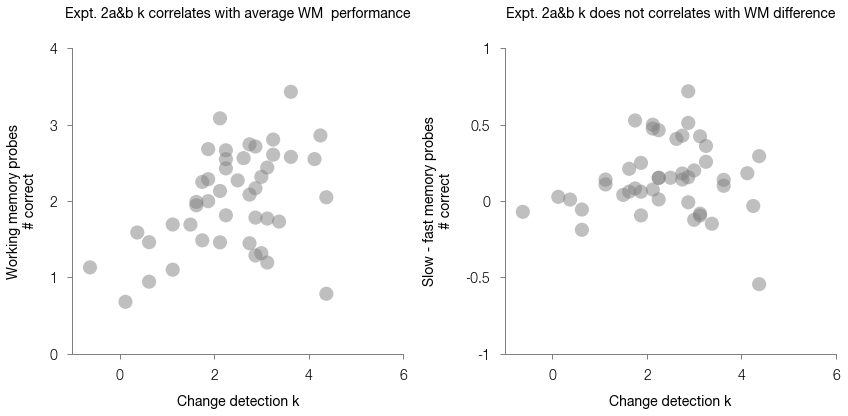

In [10]:

#plot result
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
ax.scatter(cd_k,wm_n,200,edgecolor='None',facecolor='gray',alpha=.5,clip_on=False)
prettify_plot(ax,ylim=([0,4]), yt=([0,1,2,3,4]),ytl=([0,1,2,3,4]),yl='Working memory probes\n# correct',ylrot=90,
              xlim=(-1,6), xt=([0,2,4,6]),xtl=([0,2,4,6]),xl='Change detection k',
              t='Expt. 2a&b k correlates with average WM  performance')

ax = plt.subplot(122)
ax.scatter(cd_k,wm_d,200,edgecolor='None',facecolor='gray',alpha=.5,clip_on=False)
prettify_plot(ax,ylim=([-1,1]), yt=([-1,-.5,0,.5,1]),ytl=([-1,-.5,0,.5,1]),yl='Slow - fast memory probes\n# correct',ylrot=90,
              xlim=(-1,6), xt=([0,2,4,6]),xtl=([0,2,4,6]),xl='Change detection k',
              t='Expt. 2a&b k does not correlates with WM difference')
plt.show()